In [1]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Layers = []
LearnRate = []
Drop = []
Processing_Time = []
Training_Set_Accuracy = []
Test_Set_Accuracy = []
History = []
Predicts = []
Classes = []

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


In [3]:
max_epochs = 100  
earlystop_callback = \
    tf.keras.callbacks.EarlyStopping(monitor='val_acc',\
    min_delta=0.01, patience=5, verbose=0, mode='auto',\
    baseline=None, restore_best_weights=False)

In [ ]:
for layers in range(1,4):
    for drop in range(0,2):
        model = Sequential()

        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
        model.add(Conv2D(32, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        if(drop == 1):
            model.add(Dropout(0.3))

        if(layers > 1):
            model.add(Conv2D(64, (3, 3), activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

        if(drop == 1 and layers > 1):
            model.add(Dropout(0.3))

        if(layers > 2):
            model.add(Conv2D(128, (3, 3), activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

        if(drop == 1 and layers > 2):
            model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        
        model.summary()

        adam = Adam(lr=0.001)
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

        start = time.perf_counter()
        history = model.fit(X_train, y_train,
            epochs = max_epochs, shuffle = False,
            batch_size=32, validation_split = 0.2, 
            verbose = 2,
            callbacks = [earlystop_callback])

        elapsed = time.perf_counter() - start
        y_preds = model.predict(X_test, verbose=0)
        
        Layers.append(layers)
        Drop.append(drop)
        Processing_Time.append(elapsed)
        score, acc_train = model.evaluate(X_train, y_train)
        score, acc_test = model.evaluate(X_test, y_test)
        Training_Set_Accuracy.append(acc_train)
        Test_Set_Accuracy.append(acc_test)
        History.append(history)
        Predicts.append(y_preds)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,618,602
Trainable params: 1,618,602
Non-trainable para

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
 - 55s - loss: 1.4880 - acc: 0.4583 - val_loss: 1.2198 - val_acc: 0.5735
Epoch 2/100
 - 54s - loss: 1.1240 - acc: 0.6027 - val_loss: 1.0554 - val_acc: 0.6308
Epoch 3/100
 - 53s - loss: 0.9717 - acc: 0.6587 - val_loss: 0.9877 - val_acc: 0.6544
Epoch 4/100
 - 53s - loss: 0.8603 - acc: 0.6979 - val_loss: 0.8877 - val_acc: 0.6889
Epoch 5/100
 - 53s - loss: 0.7779 - acc: 0.7277 - val_loss: 0.8699 - val_acc: 0.6964
Epoch 6/100
 - 52s - loss: 0.7167 - acc: 0.7483 - val_loss: 0.7948 - val_acc: 0.7268
Epoch 7/100
 - 52s - loss: 0.6583 - acc: 0.7669 - val_loss: 0.8651 - val_acc: 0.7003
Epoch 8/100
 - 52s - loss: 0.6172 - acc: 0.7813 - val_loss: 0.8326 - val_acc: 0.7203
Epoch 9/100
 - 52s - loss: 0.5771 - acc: 0.7962 - val_loss: 0.8323 - val_acc: 0.7216
Epoch 10/100
 - 52s - loss: 0.5361 - acc: 0.8103 - val_loss: 0.8910 - val_acc: 0.7095
Epoch 11/100


In [112]:
for layers in range(1,4):
    for learnrate in [0.01, 0.001, 0.002]:
        for drop in range(0,2):
            model = Sequential()

            model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
            model.add(Conv2D(32, (3, 3), activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
        
            if(layers > 1):
                model.add(Conv2D(64, (3, 3), activation='relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            if(layers > 2):
                model.add(Conv2D(128, (3, 3), activation='relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            if(drop == 1):
                model.add(Dropout(0.3))

            model.add(Flatten())
            model.add(Dense(256, activation='relu'))
            model.add(Dense(10, activation='softmax'))
        
            model.summary()

            adam = Adam(lr=learnrate)
            model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

            start = time.perf_counter()
            history = model.fit(X_train, y_train,
                epochs = max_epochs, shuffle = False,
                batch_size=32, validation_split = 0.2, 
                verbose = 2,
                callbacks = [earlystop_callback])

            elapsed = time.perf_counter() - start
            y_preds = model.predict(X_test, verbose=0)
            y_classes = model.predict_classes(X_test, verbose=0)
        
            Layers.append(layers)
            LearnRate.append(learnrate)
            Drop.append(drop)
            Processing_Time.append(elapsed)
            score, acc_train = model.evaluate(X_train, y_train)
            score, acc_test = model.evaluate(X_test, y_test)
            Training_Set_Accuracy.append(acc_train)
            Test_Set_Accuracy.append(acc_test)
            History.append(history)
            Predicts.append(y_preds)            
            Classes.append(y_classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 256)               1605888   
_________________________________________________________________
dense_106 (Dense)            (None, 10)                2570      
Total params: 1,618,602
Trainable params: 1,618,602
Non-trainable params: 0
_________________________________________________________________


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
 - 68s - loss: 1.3844 - acc: 0.5034 - val_loss: 1.1769 - val_acc: 0.5885
Epoch 2/100
 - 61s - loss: 0.9656 - acc: 0.6585 - val_loss: 1.2111 - val_acc: 0.5987
Epoch 3/100
 - 60s - loss: 0.7217 - acc: 0.7441 - val_loss: 1.3099 - val_acc: 0.6192
Epoch 4/100
 - 61s - loss: 0.5391 - acc: 0.8120 - val_loss: 1.4590 - val_acc: 0.6074
Epoch 5/100
 - 60s - loss: 0.3837 - acc: 0.8651 - val_loss: 1.7957 - val_acc: 0.6250
Epoch 6/100
 - 64s - loss: 0.2861 - acc: 0.9011 - val_loss: 2.0846 - val_acc: 0.6264
Epoch 7/100
 - 63s - loss: 0.2312 - acc: 0.9215 - val_loss: 2.2582 - val_acc: 0.6116
Epoch 8/100
 - 63s - loss: 0.1947 - acc: 0.9335 - val_loss: 2.3995 - val_acc: 0.6054
10000/10000 [==============================] - 6s 611us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_155 (Conv2D)          (None, 30, 30, 32)        896       
___________

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
 - 69s - loss: 1.4083 - acc: 0.4923 - val_loss: 1.1420 - val_acc: 0.5911
Epoch 2/100
 - 64s - loss: 0.9805 - acc: 0.6569 - val_loss: 0.9734 - val_acc: 0.6598
Epoch 3/100
 - 66s - loss: 0.7942 - acc: 0.7245 - val_loss: 0.9192 - val_acc: 0.6802
Epoch 4/100
 - 67s - loss: 0.6572 - acc: 0.7729 - val_loss: 0.9547 - val_acc: 0.6841
Epoch 5/100
 - 65s - loss: 0.5366 - acc: 0.8124 - val_loss: 1.0740 - val_acc: 0.6768
Epoch 6/100
 - 66s - loss: 0.4422 - acc: 0.8457 - val_loss: 1.3292 - val_acc: 0.6604
Epoch 7/100
 - 65s - loss: 0.3594 - acc: 0.8727 - val_loss: 1.3613 - val_acc: 0.6700
Epoch 8/100
 - 64s - loss: 0.2848 - acc: 0.8987 - val_loss: 1.4158 - val_acc: 0.6864
10000/10000 [==============================] - 7s 723us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_166 (Conv2D)          (None, 30, 30, 32)        896       
___________

Epoch 8/100
 - 65s - loss: 0.5916 - acc: 0.7902 - val_loss: 0.9762 - val_acc: 0.6938
Epoch 9/100
 - 64s - loss: 0.5557 - acc: 0.8035 - val_loss: 0.9681 - val_acc: 0.6937
Epoch 10/100
 - 65s - loss: 0.5194 - acc: 0.8161 - val_loss: 0.9805 - val_acc: 0.6908
Epoch 11/100
 - 66s - loss: 0.5006 - acc: 0.8232 - val_loss: 0.9979 - val_acc: 0.7010
10000/10000 [==============================] - 7s 730us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_175 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 12, 12, 64)        18496     
___

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
 - 79s - loss: 1.5895 - acc: 0.4112 - val_loss: 1.2934 - val_acc: 0.5393
Epoch 2/100
 - 73s - loss: 1.1997 - acc: 0.5697 - val_loss: 1.0614 - val_acc: 0.6230
Epoch 3/100
 - 72s - loss: 1.0261 - acc: 0.6337 - val_loss: 0.9963 - val_acc: 0.6482
Epoch 4/100
 - 72s - loss: 0.9193 - acc: 0.6753 - val_loss: 0.9665 - val_acc: 0.6592
Epoch 5/100
 - 71s - loss: 0.8365 - acc: 0.7007 - val_loss: 0.8763 - val_acc: 0.7017
Epoch 6/100
 - 72s - loss: 0.7769 - acc: 0.7239 - val_loss: 0.8278 - val_acc: 0.7149
Epoch 7/100
 - 70s - loss: 0.7198 - acc: 0.7454 - val_loss: 0.8754 - val_acc: 0.7004
Epoch 8/100
 - 70s - loss: 0.6790 - acc: 0.7571 - val_loss: 0.8005 - val_acc: 0.7246
Epoch 9/100
 - 69s - loss: 0.6422 - acc: 0.7712 - val_loss: 0.7925 - val_acc: 0.7325
Epoch 10/100
 - 69s - loss: 0.6145 - acc: 0.7816 - val_loss: 0.7682 - val_acc: 0.7407
Epoch 11/100
 - 71s - loss: 0.5803 - acc: 0.7937 - val_loss: 0.7984 - val_acc: 0.7362
Epoch 12/100


In [86]:
def plotLosses(history, drop):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    dropoutuse = "dropout of rate .3"

    if(drop == 0):
        dropoutuse = "no dropout"

    plt.title('Model Loss for a Convnet with ' + str(layers) + ' layers and a ' + dropoutuse)

    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [107]:
def plotLosseslr(history, layers, lr, drop):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    dropoutuse = "dropout of rate .3"

    if(drop == 0):
        dropoutuse = "no dropout"

    plt.title('Model Loss for a Convnet with ' + str(layers) + 
              ' layer and a learning rate of ' + str(lr) + ' and ' + dropoutuse)

    if(layers > 1):
        plt.title('Model Loss for a Convnet with ' + str(layers) + 
                  ' layer and a learning rate of ' + str(lr) + ' and ' + dropoutuse)

    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [87]:
from prettytable import PrettyTable

+--------+---------+--------------+--------------------+-------------------+
| Layers | Dropout | Process_Time | Train_Set_Accuracy | Test_Set_Accuracy |
+--------+---------+--------------+--------------------+-------------------+
|   1    |    0    |   354.044    |        0.82        |       0.611       |
|   1    |    1    |   850.124    |       0.844        |       0.658       |
|   2    |    0    |   394.903    |       0.813        |       0.642       |
|   2    |    1    |   1148.879   |        0.85        |       0.731       |
|   3    |    0    |   600.067    |       0.758        |       0.637       |
|   3    |    1    |   1437.892   |       0.795        |       0.738       |
+--------+---------+--------------+--------------------+-------------------+


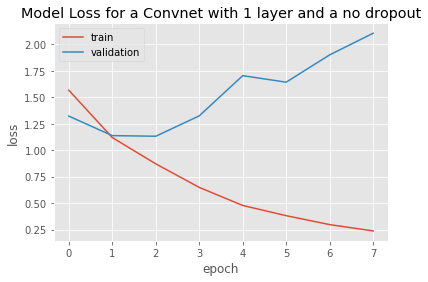

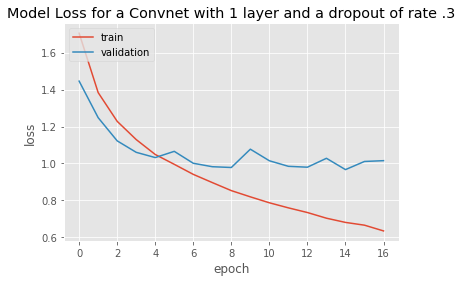

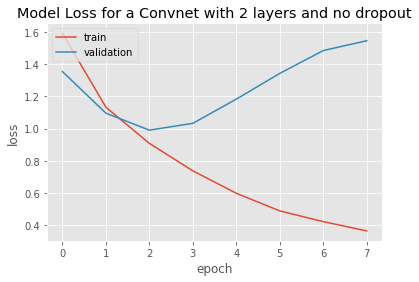

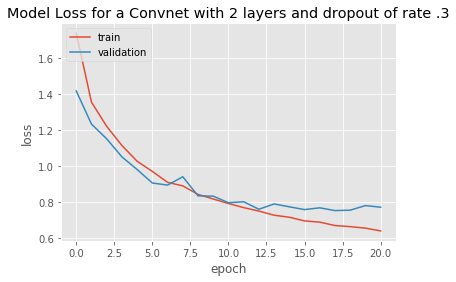

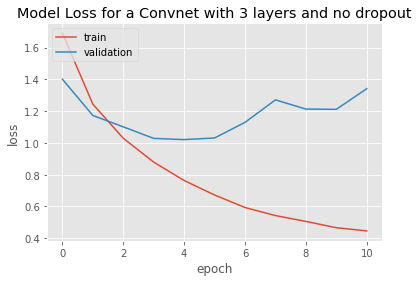

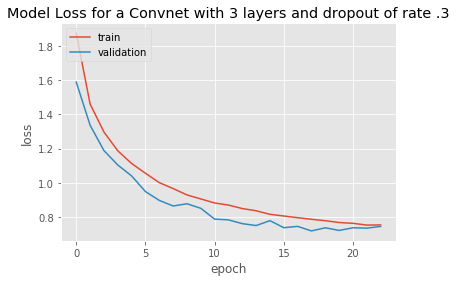

In [88]:
table = PrettyTable(['Layers', 'Dropout', 'Process_Time', 
                     'Train_Set_Accuracy', 'Test_Set_Accuracy'])
for x in range(0, 6):
    table.add_row([Layers[x], Drop[x],
                   round(Processing_Time[x], 3), 
                   round(Training_Set_Accuracy[x], 3), 
                   round(Test_Set_Accuracy[x], 3)])
print(table)

for x in range(0, 6):
    plotLosses(History[x], Layers[x], Drop[x])


+--------+---------+--------------+--------------------+-------------------+
| Layers | Dropout | Process_Time | Train_Set_Accuracy | Test_Set_Accuracy |
+--------+---------+--------------+--------------------+-------------------+
|   1    |    0    |   482.282    |        0.87        |       0.625       |
|   1    |    1    |   966.913    |       0.907        |       0.702       |
|   2    |    0    |   441.202    |       0.816        |       0.658       |
|   1    |    0    |   451.838    |       0.864        |       0.638       |
|   1    |    0    |   394.188    |       0.833        |       0.626       |
|   1    |    1    |    525.21    |       0.876        |       0.667       |
+--------+---------+--------------+--------------------+-------------------+


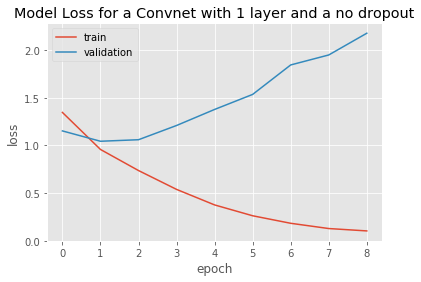

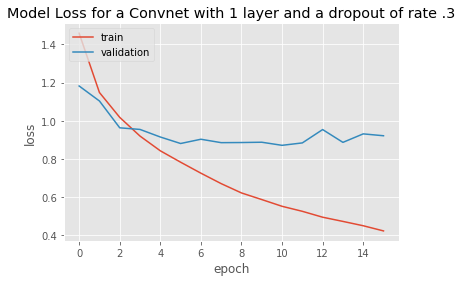

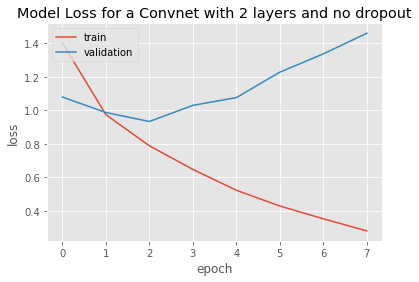

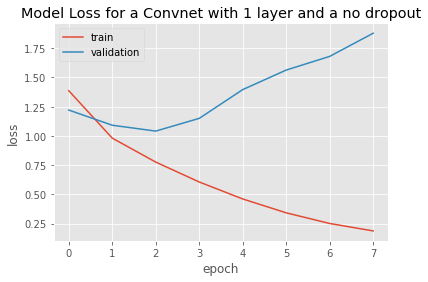

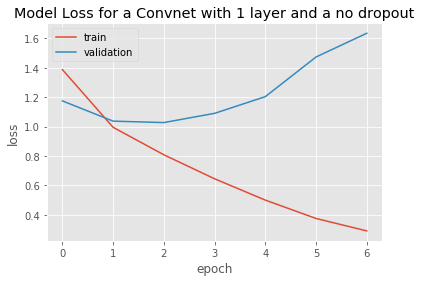

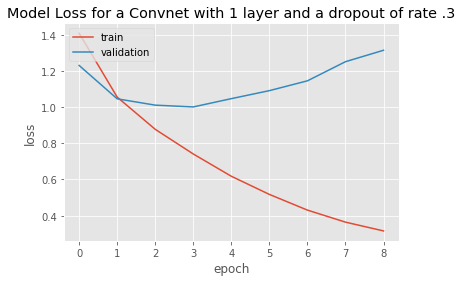

In [96]:
table = PrettyTable(['Layers', 'Dropout', 'Process_Time', 
                     'Train_Set_Accuracy', 'Test_Set_Accuracy'])
for x in range(0, 6):
    table.add_row([Layers[x], Drop[x],
                   round(Processing_Time[x], 3), 
                   round(Training_Set_Accuracy[x], 3), 
                   round(Test_Set_Accuracy[x], 3)])
print(table)

for x in range(0, 6):
    plotLosses(History[x], Layers[x], Drop[x])


+--------+---------------+---------+--------------+--------------------+-------------------------+
| Layers | Learning_Rate | Dropout | Process_Time | Train_Set_Accuracy | Validation_Set_Accuracy |
+--------+---------------+---------+--------------+--------------------+-------------------------+
|   1    |      0.01     |    0    |   370.373    |        0.1         |           0.1           |
|   1    |      0.01     |    1    |   384.619    |        0.1         |           0.1           |
|   1    |     0.001     |    0    |    503.18    |        0.85        |          0.625          |
|   1    |     0.001     |    1    |   570.972    |       0.877        |          0.664          |
|   1    |     0.002     |    0    |   501.481    |       0.833        |          0.599          |
|   1    |     0.002     |    1    |   683.861    |       0.853        |          0.623          |
|   2    |      0.01     |    0    |   396.558    |        0.1         |           0.1           |
|   2    |

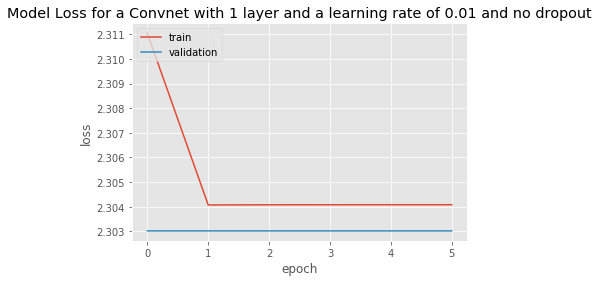

C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test set F1 (weighted average): 0.01818181818181818 


Classification report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.10      1.00      0.18      1000
       truck       0.00      0.00      0.00      1000

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0 10

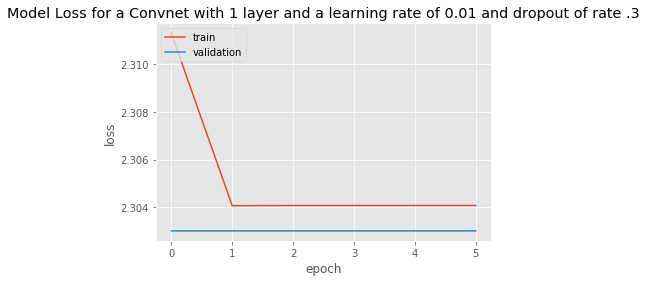

C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test set F1 (weighted average): 0.01818181818181818 


Classification report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.10      1.00      0.18      1000
       truck       0.00      0.00      0.00      1000

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0 10

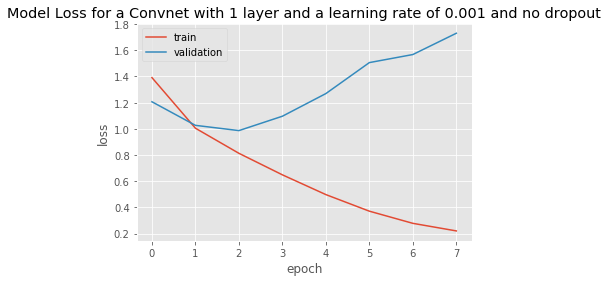

Test set F1 (weighted average): 0.6208152290388957 


Classification report:
              precision    recall  f1-score   support

    airplane       0.63      0.74      0.68      1000
  automobile       0.69      0.81      0.74      1000
        bird       0.57      0.42      0.48      1000
         cat       0.46      0.36      0.40      1000
        deer       0.54      0.59      0.57      1000
         dog       0.51      0.58      0.54      1000
        frog       0.75      0.63      0.68      1000
       horse       0.68      0.68      0.68      1000
        ship       0.73      0.72      0.72      1000
       truck       0.68      0.72      0.70      1000

   micro avg       0.63      0.63      0.63     10000
   macro avg       0.62      0.63      0.62     10000
weighted avg       0.62      0.63      0.62     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[736  41  34  28  34   4   5   8  59  51]
 [ 22 810   5  11   4   8   4   7  42  87]
 [122  10 41

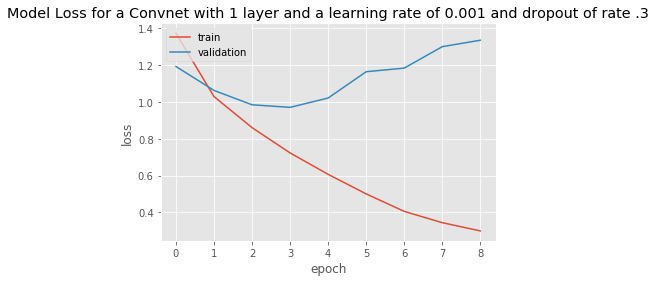

Test set F1 (weighted average): 0.6620790427427106 


Classification report:
              precision    recall  f1-score   support

    airplane       0.72      0.70      0.71      1000
  automobile       0.78      0.77      0.77      1000
        bird       0.58      0.48      0.52      1000
         cat       0.46      0.45      0.46      1000
        deer       0.63      0.57      0.60      1000
         dog       0.54      0.59      0.56      1000
        frog       0.70      0.78      0.74      1000
       horse       0.69      0.78      0.73      1000
        ship       0.82      0.74      0.78      1000
       truck       0.72      0.77      0.74      1000

   micro avg       0.66      0.66      0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[702  24  55  24  28  10  17  18  66  56]
 [ 19 773   8  12   3   8  13   2  25 137]
 [ 73   6 47

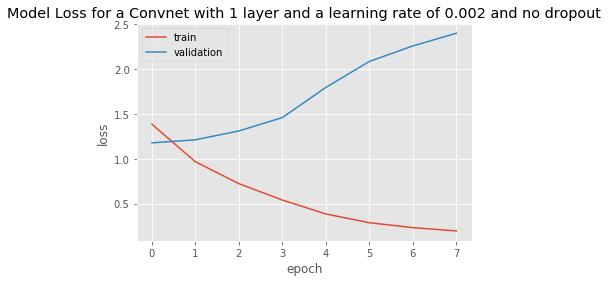

Test set F1 (weighted average): 0.6006462652818715 


Classification report:
              precision    recall  f1-score   support

    airplane       0.69      0.61      0.65      1000
  automobile       0.69      0.78      0.73      1000
        bird       0.58      0.39      0.47      1000
         cat       0.35      0.53      0.42      1000
        deer       0.54      0.48      0.51      1000
         dog       0.45      0.46      0.45      1000
        frog       0.73      0.66      0.69      1000
       horse       0.66      0.67      0.66      1000
        ship       0.68      0.80      0.74      1000
       truck       0.76      0.61      0.68      1000

   micro avg       0.60      0.60      0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[611  43  39  62  37  20  10  15 126  37]
 [ 23 779  13  20   5   8   7   4  68  73]
 [ 76  17 39

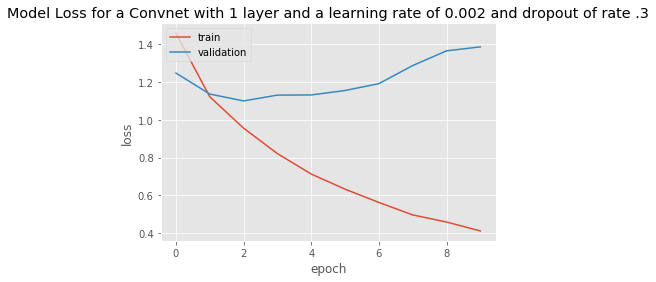

Test set F1 (weighted average): 0.6223211037951594 


Classification report:
              precision    recall  f1-score   support

    airplane       0.73      0.64      0.68      1000
  automobile       0.79      0.72      0.75      1000
        bird       0.57      0.41      0.48      1000
         cat       0.40      0.37      0.38      1000
        deer       0.51      0.65      0.57      1000
         dog       0.48      0.55      0.51      1000
        frog       0.62      0.78      0.69      1000
       horse       0.75      0.61      0.67      1000
        ship       0.82      0.73      0.77      1000
       truck       0.66      0.78      0.72      1000

   micro avg       0.62      0.62      0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[636  22  59  32  61  18  18  10  56  88]
 [ 17 718  12  21  12   7  11   6  32 164]
 [ 70   5 41

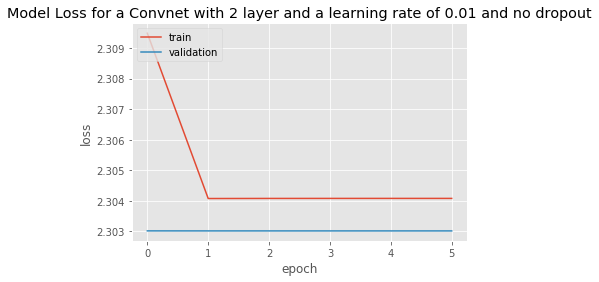

C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test set F1 (weighted average): 0.01818181818181818 


Classification report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.10      1.00      0.18      1000
       truck       0.00      0.00      0.00      1000

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0 10

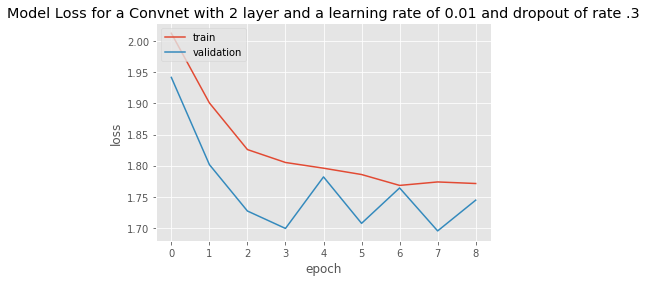

Test set F1 (weighted average): 0.3423068757878308 


Classification report:
              precision    recall  f1-score   support

    airplane       0.44      0.48      0.46      1000
  automobile       0.37      0.44      0.40      1000
        bird       0.43      0.09      0.15      1000
         cat       0.25      0.20      0.22      1000
        deer       0.40      0.22      0.28      1000
         dog       0.33      0.40      0.36      1000
        frog       0.43      0.41      0.42      1000
       horse       0.37      0.30      0.33      1000
        ship       0.34      0.35      0.34      1000
       truck       0.33      0.72      0.45      1000

   micro avg       0.36      0.36      0.36     10000
   macro avg       0.37      0.36      0.34     10000
weighted avg       0.37      0.36      0.34     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[476  54   6  20   6  22  14  24 211 167]
 [ 48 441   6  11   4   7  26  10  97 350]
 [100  62  9

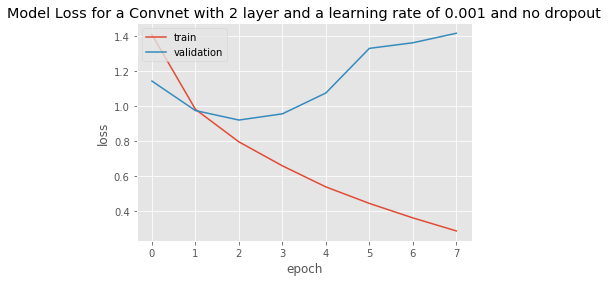

Test set F1 (weighted average): 0.6870845803652664 


Classification report:
              precision    recall  f1-score   support

    airplane       0.76      0.69      0.72      1000
  automobile       0.88      0.76      0.81      1000
        bird       0.58      0.57      0.57      1000
         cat       0.46      0.46      0.46      1000
        deer       0.61      0.61      0.61      1000
         dog       0.52      0.68      0.59      1000
        frog       0.80      0.74      0.77      1000
       horse       0.72      0.76      0.74      1000
        ship       0.82      0.81      0.82      1000
       truck       0.80      0.77      0.78      1000

   micro avg       0.68      0.68      0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[689  11 105  29  43  11   7  19  56  30]
 [ 29 755  10  20  19  17   7  11  43  89]
 [ 44   3 56

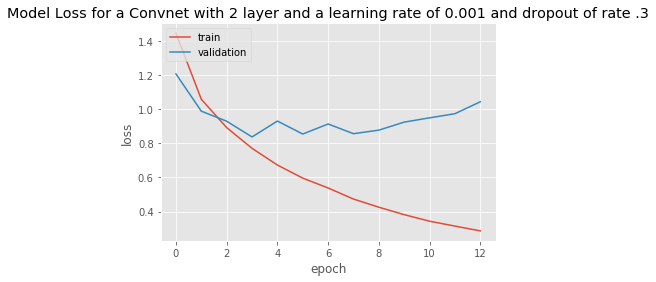

Test set F1 (weighted average): 0.7145959528607922 


Classification report:
              precision    recall  f1-score   support

    airplane       0.73      0.81      0.77      1000
  automobile       0.83      0.86      0.84      1000
        bird       0.67      0.54      0.60      1000
         cat       0.50      0.48      0.49      1000
        deer       0.68      0.60      0.64      1000
         dog       0.55      0.67      0.60      1000
        frog       0.79      0.78      0.78      1000
       horse       0.71      0.81      0.75      1000
        ship       0.89      0.79      0.84      1000
       truck       0.82      0.81      0.82      1000

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[814  21  40  17  20   8   5  13  33  29]
 [ 21 858   8   7   1   7   8   8  13  69]
 [ 82   4 54

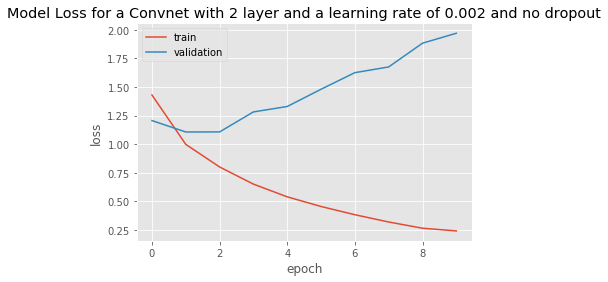

Test set F1 (weighted average): 0.6407788260407977 


Classification report:
              precision    recall  f1-score   support

    airplane       0.64      0.70      0.67      1000
  automobile       0.77      0.78      0.77      1000
        bird       0.56      0.49      0.52      1000
         cat       0.44      0.38      0.41      1000
        deer       0.63      0.53      0.57      1000
         dog       0.53      0.55      0.54      1000
        frog       0.72      0.73      0.72      1000
       horse       0.71      0.69      0.70      1000
        ship       0.71      0.81      0.76      1000
       truck       0.70      0.81      0.75      1000

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.64      0.65      0.64     10000
weighted avg       0.64      0.65      0.64     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[700  26  33  24  21  12  11  13 107  53]
 [ 19 777  13   4   2   5  13   2  53 112]
 [ 98  14 49

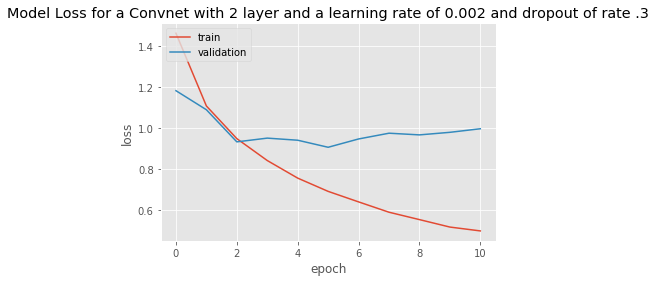

Test set F1 (weighted average): 0.6991588480985484 


Classification report:
              precision    recall  f1-score   support

    airplane       0.75      0.72      0.73      1000
  automobile       0.87      0.82      0.85      1000
        bird       0.65      0.59      0.62      1000
         cat       0.56      0.40      0.46      1000
        deer       0.61      0.70      0.65      1000
         dog       0.58      0.64      0.61      1000
        frog       0.70      0.82      0.76      1000
       horse       0.71      0.73      0.72      1000
        ship       0.79      0.81      0.80      1000
       truck       0.80      0.80      0.80      1000

   micro avg       0.70      0.70      0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[720  10  62  13  50   6  15  17  71  36]
 [ 15 822   2   4  10   2  15   5  43  82]
 [ 55   3 59

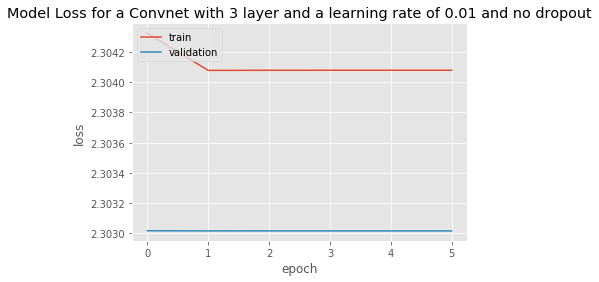

C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test set F1 (weighted average): 0.01818181818181818 


Classification report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.10      1.00      0.18      1000
       truck       0.00      0.00      0.00      1000

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0 10

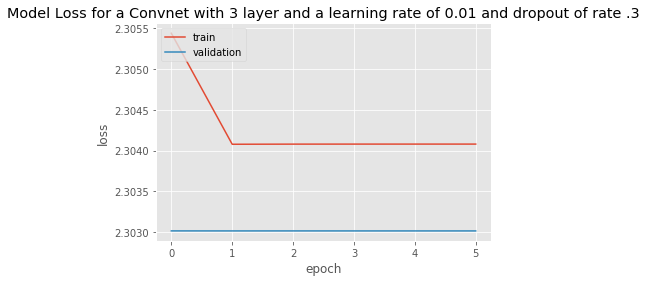

C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jbark\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test set F1 (weighted average): 0.01818181818181818 


Classification report:
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.10      1.00      0.18      1000
       truck       0.00      0.00      0.00      1000

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0 10

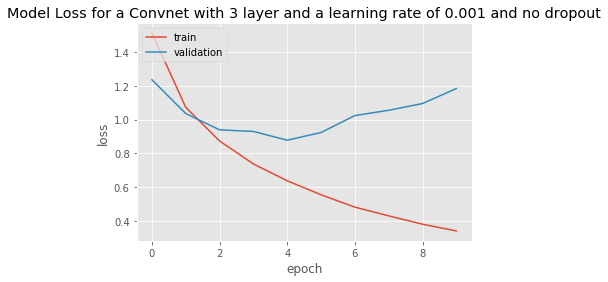

Test set F1 (weighted average): 0.6909425689566335 


Classification report:
              precision    recall  f1-score   support

    airplane       0.68      0.79      0.73      1000
  automobile       0.84      0.76      0.80      1000
        bird       0.63      0.60      0.61      1000
         cat       0.57      0.40      0.47      1000
        deer       0.69      0.64      0.66      1000
         dog       0.60      0.64      0.62      1000
        frog       0.78      0.75      0.76      1000
       horse       0.74      0.68      0.71      1000
        ship       0.81      0.81      0.81      1000
       truck       0.64      0.87      0.74      1000

   micro avg       0.69      0.69      0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[789  15  44   7   8  10   6   7  51  63]
 [ 19 764   6   3   0   4   4   1  39 160]
 [101   8 59

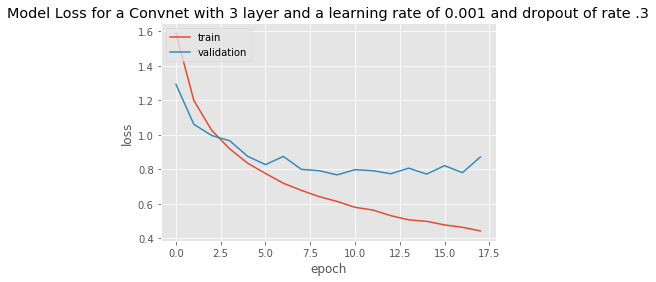

Test set F1 (weighted average): 0.7175073844385964 


Classification report:
              precision    recall  f1-score   support

    airplane       0.77      0.75      0.76      1000
  automobile       0.88      0.83      0.85      1000
        bird       0.71      0.59      0.65      1000
         cat       0.55      0.45      0.50      1000
        deer       0.76      0.55      0.64      1000
         dog       0.53      0.78      0.63      1000
        frog       0.83      0.73      0.78      1000
       horse       0.67      0.80      0.73      1000
        ship       0.83      0.85      0.84      1000
       truck       0.76      0.86      0.81      1000

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[751  20  39  24  12  13   4  25  65  47]
 [ 17 827   3   6   1   8   5   2  30 101]
 [ 63   5 59

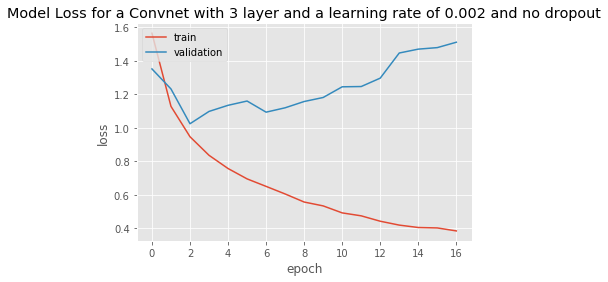

Test set F1 (weighted average): 0.6551347551431753 


Classification report:
              precision    recall  f1-score   support

    airplane       0.69      0.71      0.70      1000
  automobile       0.85      0.79      0.82      1000
        bird       0.63      0.48      0.55      1000
         cat       0.39      0.55      0.45      1000
        deer       0.65      0.52      0.57      1000
         dog       0.52      0.58      0.55      1000
        frog       0.77      0.67      0.72      1000
       horse       0.70      0.65      0.67      1000
        ship       0.75      0.79      0.77      1000
       truck       0.72      0.78      0.75      1000

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.67      0.65      0.66     10000
weighted avg       0.67      0.65      0.66     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[713  21  66  28  15  10   5  16  88  38]
 [ 22 785   1  11   9   6   7   3  42 114]
 [ 83   3 48

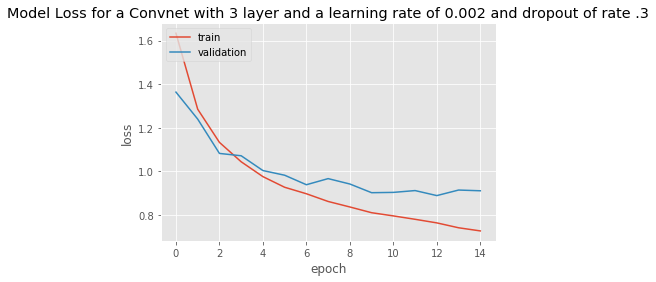

Test set F1 (weighted average): 0.6851459733050393 


Classification report:
              precision    recall  f1-score   support

    airplane       0.75      0.69      0.72      1000
  automobile       0.81      0.85      0.83      1000
        bird       0.71      0.49      0.58      1000
         cat       0.47      0.53      0.50      1000
        deer       0.70      0.52      0.60      1000
         dog       0.57      0.67      0.61      1000
        frog       0.81      0.69      0.75      1000
       horse       0.59      0.82      0.69      1000
        ship       0.84      0.75      0.79      1000
       truck       0.74      0.85      0.79      1000

   micro avg       0.69      0.69      0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

Confusion matrix
(rows = true digits, columns = predicted digits)
[[688  26  44  44  20   5   4  36  69  64]
 [ 14 855   0  11   2   7   1   8  13  89]
 [ 59  13 48

In [143]:
table = PrettyTable(['Layers', 'Learning_Rate', 'Dropout', 'Process_Time', 
                     'Train_Set_Accuracy', 'Validation_Set_Accuracy'])
for x in range(0, 18):
    table.add_row([Layers[x], LearnRate[x], Drop[x],
                   round(Processing_Time[x], 3), 
                   round(Training_Set_Accuracy[x], 3), 
                   round(Test_Set_Accuracy[x], 3)])
print(table)

for x in range(0, 18):
    plotLosseslr(History[x], Layers[x], LearnRate[x], Drop[x])
    y_labels = np.argmax(y_test, axis = 1)
    test_preds = np.argmax(Predicts[x], axis = 1)
    print("Test set F1 (weighted average):", \
       metrics.precision_recall_fscore_support(y_labels, test_preds, average='weighted')[2], "\n")
    print("\nClassification report:\n%s"
          % (metrics.classification_report(y_labels, test_preds, \
    	target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])))
    cm_data = metrics.confusion_matrix(y_labels, test_preds)
    print('Confusion matrix')
    print('(rows = true digits, columns = predicted digits)\n%s' % cm_data)


In [140]:
y_labels = np.argmax(y_test, axis = 1)
test_preds = np.argmax(y_preds, axis = 1)
print("Test set F1 (weighted average):", \
    metrics.precision_recall_fscore_support(y_labels, test_preds, average='weighted')[2], "\n")
print("\nClassification report:\n%s"
      % (metrics.classification_report(y_labels, test_preds, \
	target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])))


Test set F1 (weighted average): 0.6851459733050393 


Classification report:
              precision    recall  f1-score   support

    airplane       0.75      0.69      0.72      1000
  automobile       0.81      0.85      0.83      1000
        bird       0.71      0.49      0.58      1000
         cat       0.47      0.53      0.50      1000
        deer       0.70      0.52      0.60      1000
         dog       0.57      0.67      0.61      1000
        frog       0.81      0.69      0.75      1000
       horse       0.59      0.82      0.69      1000
        ship       0.84      0.75      0.79      1000
       truck       0.74      0.85      0.79      1000

   micro avg       0.69      0.69      0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [89]:
# examine the predicted values within a precision/recall framework
test_preds = np.argmax(model.predict(X_test), axis = 1)

print('\n Listing of first twenty test labels and predictions')
print('test_labels', y_test[:20])
print('test_preds ', test_preds[:20])



 Listing of first twenty test labels and predictions
test_labels [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
test_preds  [3 8 8 0 6 6 1 4 3 6 0 9 5 7 9 8 5 7 8 6]


In [114]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [142]:
y_labels = np.argmax(y_test, axis = 1)
test_preds = np.argmax(y_preds, axis = 1)
#print(metrics.accuracy_score(y_test, np.argmax(y_preds, axis=1)))
print("Test set F1 (weighted average):", \
    metrics.precision_recall_fscore_support(y_labels, test_preds, average='weighted')[2], "\n")
cm_data = metrics.confusion_matrix(y_labels, test_preds)
print('Confusion matrix')
print('(rows = true digits, columns = predicted digits)\n%s' % cm_data)


Test set F1 (weighted average): 0.6851459733050393 

Confusion matrix
(rows = true digits, columns = predicted digits)
[[688  26  44  44  20   5   4  36  69  64]
 [ 14 855   0  11   2   7   1   8  13  89]
 [ 59  13 486 108  75 103  44  77  17  18]
 [ 14  10  32 531  34 210  35 103   6  25]
 [ 16   6  52 105 523  47  46 182   8  15]
 [  6   7  21 162  22 665  14  92   2   9]
 [  6  25  27  88  41  57 689  42  11  14]
 [ 10   7   9  53  20  68   3 819   2   9]
 [ 88  44   5  21   8   7   4  11 753  59]
 [ 13  69   4  10   2   6   6  17  20 853]]


In [138]:
print(y_test.shape)
print(y_preds.shape)
print(y_labels.shape)
print(test_preds.shape)
print(y_test[0,:])
print(y_preds[0,:])
print(test_preds[0])
print(y_labels[0])

(10000, 10)
(10000, 10)
(10000,)
(10000,)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[4.0054985e-04 1.2209995e-03 2.8657969e-03 6.0444617e-01 1.0047462e-03
 3.0463302e-01 6.4404197e-02 5.8251992e-03 7.2783539e-03 7.9209711e-03]
3
3


In [135]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])
precision_recall_fscore_support(y_true, y_pred, average='macro')
precision_recall_fscore_support(y_true, y_pred, average='weighted')

(0.2222222222222222, 0.3333333333333333, 0.26666666666666666, None)

In [110]:
print("\nClassification report:\n%s"
      % (metrics.classification_report(y_test, test_preds, \
	target_names = ['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4', \
	 'digit 5', 'digit 6', 'digit 7', 'digit 8', 'digit 9'])))

# note that the weighted average is most appropriate for classification
# problems that are unbalanced. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
print("Test set F1 (weighted average):", \
    metrics.precision_recall_fscore_support(y_test, test_preds, average='weighted')[2], "\n")

cm_data = metrics.confusion_matrix(y_test, test_preds)
print('Confusion matrix')
print('(rows = true digits, columns = predicted digits)\n%s' % cm_data)

# plot confusion matrix to external file
def plot_confusion(cm_data):
    plt.figure()
    selected_cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sns_plot = sns.heatmap(cm_data, annot=True, fmt="d", \
	    cmap = selected_cmap, linewidths = 0.5, cbar = False)
    sns_plot.set_yticklabels(sns_plot.get_yticklabels(), rotation = 0)
    plt.title('Confusion Matrix')
    plt.ylabel('True Digit')
    plt.xlabel('Predicted Digit')
    # plt.show() # use if plot to screen is desired
    plt.savefig('fig-confusion-matrix.pdf', 
        papertype = 'letter', orientation ='landscape')
    plt.close()

plot_confusion(cm_data)


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets